In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color
import random
import torchvision

import torch
from tqdm import tqdm
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
images_path = '../../data_train/' # Ruta de las imagenes
classes = os.listdir(images_path) # Carpetas con cada label.
print(f'Clases : {classes}')

Clases : ['paper', 'rock', 'scissors']


In [3]:
images,label = [],[] # Genero 2 listas con la ruta relativa de la imagen incluida esta, y otra con los labeles,
for ind,clase in enumerate(classes):
    direccion = os.listdir(f'{images_path}{clase}')
    images += [f'{images_path}{clase}/{img}' for img in direccion]
    label += [ind]*len(direccion)
print(images)
print(label)

['../../data_train/paper/glu_161.png', '../../data_train/paper/glu_162.png', '../../data_train/paper/glu_163.png', '../../data_train/paper/glu_164.png', '../../data_train/paper/glu_165.png', '../../data_train/paper/glu_166.png', '../../data_train/paper/glu_167.png', '../../data_train/paper/glu_168.png', '../../data_train/paper/glu_169.png', '../../data_train/paper/glu_170.png', '../../data_train/paper/glu_171.png', '../../data_train/paper/glu_172.png', '../../data_train/paper/glu_173.png', '../../data_train/paper/glu_174.png', '../../data_train/paper/glu_175.png', '../../data_train/paper/glu_176.png', '../../data_train/paper/glu_177.png', '../../data_train/paper/glu_178.png', '../../data_train/paper/glu_179.png', '../../data_train/paper/glu_180.png', '../../data_train/paper/glu_181.png', '../../data_train/paper/glu_182.png', '../../data_train/paper/glu_183.png', '../../data_train/paper/glu_184.png', '../../data_train/paper/glu_185.png', '../../data_train/paper/glu_186.png', '../../data

### Labels: 0  = Papel,  1 = Rock , 2 = Scissors

In [4]:
clases = {
    0: 'Papel',
    1:'Rock',
    2:'Scissors'
}

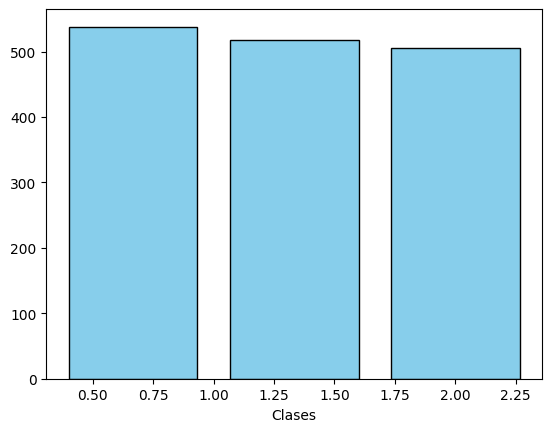

In [5]:
plt.hist(label,bins=3,align='right', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Clases')
plt.show()

## Se puede observar una distribucion semejange entre las clases

## Voy a mostrar algunas imagenes

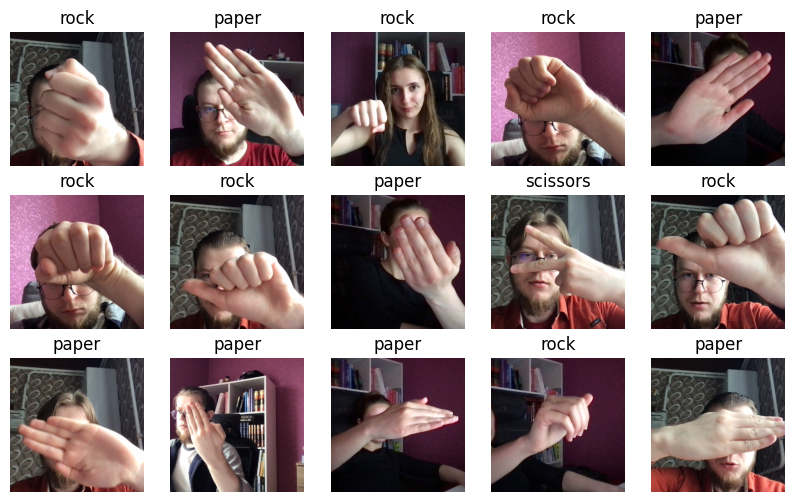

In [6]:
fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(images)-1) # Genero un indice random para la lista de iamgenes
    img = io.imread(images[ix]) # Leo con imread a la imagen segun indice
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(classes[label[ix]]) # Veo las clases con el indice
plt.show()

### Procedo a separar los datos en conjunto de entrenamiento y testeo


In [7]:
train_images, test_images, train_labels, test_labels = train_test_split(images, label, test_size=0.2, random_state=42)

A menudo Pytorch funciona mejor en tarjeta grafica, por esto genero una variable device para poder usarla en el caso de tenerse la posibilidad

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

Ahora generare el conjunto de datos apropiado que pytorch necesita para el modelo,
para estoy primero voy a generar la clase Dataset que herada de Dataset de Pytorch, la cual tenedra como atributos el conjunto X y sus labels, ademas de un metodo(__getitem__) para tener los datos de forma apropiada

In [9]:
class Dataset(torch.utils.data.Dataset): # Genero la clase Dataset para las imagenes
  def __init__(self, X, y, trans, device):
    self.X = X # Conjunto de imagenes
    self.y = y # Clases
    self.trans = trans # Trasnformacion que pueda aplicarle
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix]) #Leo la imagen
    img = Image.fromarray(img[:, :, :3])  # Tomo solo los primeros 3 canales (RGB)

    # aplicar transformaciones
    if self.trans: # Si incorpore una trasnformacion la aplico
      img = self.trans(img)
    return img, torch.tensor(self.y[ix]) #Retorno cfomo tensor, con la imagen normalizada y permutadando dfebido a los canales

Ahora voy a instanciar la clase Dataset, con mis datos, no sin antes definir un transformador para asegurarme que las imagenes tengan todas los tamaños adecuados

In [10]:
transform = transforms.Compose([

    transforms.Resize((224, 224)),
    transforms.ToTensor(),

]) # Realizo una trasnformacion para escalar las imagenes a 224x224

In [11]:
# Diccionario dataset, que contiene un objeto dataset para train y test
dataset = {
    'train': Dataset(train_images, train_labels, transform, device),
    'test': Dataset(test_images, test_labels, transform, device),

}

Para realizar un entrenamiento mas optimo para a definir dataloaders para tener batch de 64 imagnees

In [12]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=256, shuffle=False)
}

print(f'Conjunto de entrenamiento:{len(dataset["train"])},Conjunto de testeo:{len(dataset["test"])}')

Conjunto de entrenamiento:1248,Conjunto de testeo:312


Ahora que esta todo las dimensiones para poder aceptarse por pytorc deberian ser (64,3,224,224) para cada batch

In [13]:
for imgs, labels in iter(dataloader['train']):
  print(imgs.shape)

torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([32, 3, 224, 224])


## Todo esta en orden, es momento de pasar a definir la red neuronal

In [14]:
# Funcion que se encarga del entrenamiento
def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    accuaracy_train,acuaracy_test = [],[]
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        accuaracy_train.append(np.mean(train_acc))
        acuaracy_test.append(np.mean(val_acc))
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")
    return [accuaracy_train,acuaracy_test]

## Red neuronal creada por capas

### Definición de la red neuronal a partir de la arquitectura de la red resnet, modificando la capa de salida para que tenga 3 clases.

In [15]:
#Importo el modelo resnet, el cual es un modelo preentrenado con 1000 salidas
resnet = torchvision.models.resnet18()

In [16]:
class Model(torch.nn.Module):
  def __init__(self, n_outputs=3, pretrained=False, freeze=False):
    super().__init__()
    # descargamos resnet
    resnet = torchvision.models.resnet18(pretrained=pretrained)
    # nos quedamos con todas las capas menos la última
    self.resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
    if freeze:
      for param in self.resnet.parameters():
        param.requires_grad=False
    # añado una nueva capa lineal para llevar a cabo la clasificación
    self.fc = torch.nn.Linear(512, 3)

  def forward(self, x):
    x = self.resnet(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

  def unfreeze(self):
    for param in self.resnet.parameters():
        param.requires_grad=True


## 1 Caso: parametro pretrained = False es decir, no voy a usar los pesos que ya tiene el modelo, solo su estructura.

In [17]:
model = Model(pretrained=False)
epochs = 8
metrics = fit(model, dataloader, epochs=8)

c:\Proyects\image_classification\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Proyects\image_classification\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
val_loss 1.18027 val_acc 0.35965: 100%|██████████| 2/2 [00:24<00:00, 12.26s/it]


Epoch 1/8 loss 1.11341 val_loss 1.18027 acc 0.35313 val_acc 0.35965


val_loss 1.13319 val_acc 0.35714: 100%|██████████| 2/2 [00:16<00:00,  8.47s/it]


Epoch 2/8 loss 1.08445 val_loss 1.13319 acc 0.39609 val_acc 0.35714


val_loss 1.09497 val_acc 0.41016: 100%|██████████| 2/2 [00:19<00:00,  9.77s/it]


Epoch 3/8 loss 1.03543 val_loss 1.09497 acc 0.46406 val_acc 0.41016


val_loss 2.05930 val_acc 0.29520: 100%|██████████| 2/2 [00:17<00:00,  8.51s/it]


Epoch 4/8 loss 1.00302 val_loss 2.05930 acc 0.51875 val_acc 0.29520


val_loss 1.32055 val_acc 0.31390: 100%|██████████| 2/2 [00:15<00:00,  7.54s/it]


Epoch 5/8 loss 0.97154 val_loss 1.32055 acc 0.54141 val_acc 0.31390


val_loss 1.28472 val_acc 0.43862: 100%|██████████| 2/2 [00:15<00:00,  7.64s/it]


Epoch 6/8 loss 0.90093 val_loss 1.28472 acc 0.60938 val_acc 0.43862


val_loss 1.13422 val_acc 0.50167: 100%|██████████| 2/2 [00:15<00:00,  7.59s/it]


Epoch 7/8 loss 0.85823 val_loss 1.13422 acc 0.62422 val_acc 0.50167


val_loss 1.23157 val_acc 0.41127: 100%|██████████| 2/2 [00:15<00:00,  7.54s/it]

Epoch 8/8 loss 0.75929 val_loss 1.23157 acc 0.69922 val_acc 0.41127


## Se puede observar que la funcion de perdida obtuvo un valor bastante bajo primer epoch que fue 0.8

In [18]:
def plot_accuracy(epochs, metrics):
    plt.scatter(list(range(1,epochs+1)),metrics[0],label='Accuaricy Train')
    plt.scatter(list(range(1,epochs+1)),metrics[1],label='Accuaricy Test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuaricy')
    plt.legend()
    plt.title("Rendimiento por cada iteración")
    plt.show()

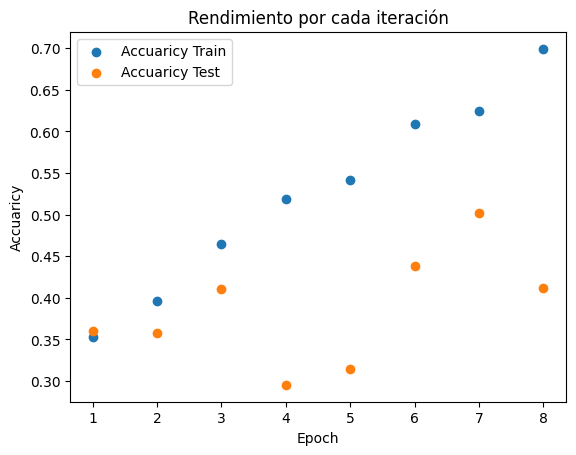

In [19]:
plot_accuracy(epochs, metrics)

## Se puede observar que al ciclo numero 8 se obtiene un accuaricy en el entrenamiento de 0.7 pero el accuaricy de test nunca sube ni se aproxima al de entrenamiento, es decir ademas de que no tiene muy buena precision sufre mucho overfiting.

## Caso 2 : Usando el paramertro pretrained = True para usar los pesos que ya posee el modelo de resnet (entrenado con millones de imagenes.), Ademas usamos True el parametro freeze el cual me permite que se actualizen o no los pesos existentes.

In [20]:
model = Model(pretrained=True,freeze=True)
epochs = 8
metrics = fit(model, dataloader, epochs=8)

c:\Proyects\image_classification\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
val_loss 0.98938 val_acc 0.50000: 100%|██████████| 2/2 [00:15<00:00,  7.61s/it]


Epoch 1/8 loss 1.04344 val_loss 0.98938 acc 0.45078 val_acc 0.50000


val_loss 0.80700 val_acc 0.68666: 100%|██████████| 2/2 [00:15<00:00,  7.66s/it]


Epoch 2/8 loss 0.82908 val_loss 0.80700 acc 0.67344 val_acc 0.68666


val_loss 0.70620 val_acc 0.75977: 100%|██████████| 2/2 [00:15<00:00,  7.54s/it]


Epoch 3/8 loss 0.71153 val_loss 0.70620 acc 0.77891 val_acc 0.75977


val_loss 0.67608 val_acc 0.71484: 100%|██████████| 2/2 [00:14<00:00,  7.49s/it]


Epoch 4/8 loss 0.63372 val_loss 0.67608 acc 0.80000 val_acc 0.71484


val_loss 0.61084 val_acc 0.75307: 100%|██████████| 2/2 [00:15<00:00,  7.80s/it]


Epoch 5/8 loss 0.57664 val_loss 0.61084 acc 0.82656 val_acc 0.75307


val_loss 0.57710 val_acc 0.82506: 100%|██████████| 2/2 [00:15<00:00,  7.52s/it]


Epoch 6/8 loss 0.51472 val_loss 0.57710 acc 0.85313 val_acc 0.82506


val_loss 0.53051 val_acc 0.84068: 100%|██████████| 2/2 [00:15<00:00,  7.57s/it]


Epoch 7/8 loss 0.49155 val_loss 0.53051 acc 0.86719 val_acc 0.84068


val_loss 0.48350 val_acc 0.86914: 100%|██████████| 2/2 [00:15<00:00,  7.70s/it]

Epoch 8/8 loss 0.46885 val_loss 0.48350 acc 0.86797 val_acc 0.86914


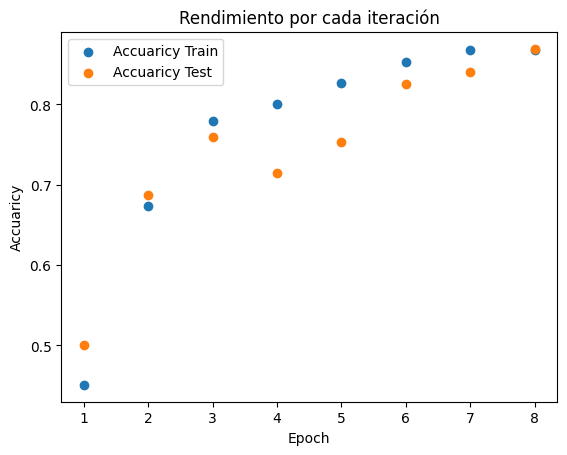

In [21]:
plot_accuracy(epochs, metrics)

## Se puede ver en este caso que a partir de 6 epoch ya se alcanza un valor de accuaricy bastante elebado, y  se observa un poco de  overfiting en 4, ademas que al usar los pesos y no actualizarlos el tiempo de entrenamiento fue de la mitad.

## El ultimo caso sera probar con pretrained = True y freeze = False, es decir que actualice los pesos.

In [22]:
model = Model(pretrained=True,freeze=False)
epochs = 8
metrics = fit(model, dataloader, epochs=8)

val_loss 0.61552 val_acc 0.83677: 100%|██████████| 2/2 [00:18<00:00,  9.30s/it]


Epoch 1/8 loss 0.82791 val_loss 0.61552 acc 0.66016 val_acc 0.83677


val_loss 0.31711 val_acc 0.94894: 100%|██████████| 2/2 [00:15<00:00,  7.88s/it]


Epoch 2/8 loss 0.38992 val_loss 0.31711 acc 0.93750 val_acc 0.94894


val_loss 0.20682 val_acc 0.95285: 100%|██████████| 2/2 [00:15<00:00,  7.69s/it]


Epoch 3/8 loss 0.19609 val_loss 0.20682 acc 0.97891 val_acc 0.95285


val_loss 0.18397 val_acc 0.95871: 100%|██████████| 2/2 [00:15<00:00,  7.75s/it]


Epoch 4/8 loss 0.12530 val_loss 0.18397 acc 0.97969 val_acc 0.95871


val_loss 0.15636 val_acc 0.94196: 100%|██████████| 2/2 [00:15<00:00,  7.65s/it]


Epoch 5/8 loss 0.08797 val_loss 0.15636 acc 0.99453 val_acc 0.94196


val_loss 0.12836 val_acc 0.95173: 100%|██████████| 2/2 [00:15<00:00,  7.86s/it]


Epoch 6/8 loss 0.05540 val_loss 0.12836 acc 0.99531 val_acc 0.95173


val_loss 0.11121 val_acc 0.97545: 100%|██████████| 2/2 [00:15<00:00,  7.59s/it]


Epoch 7/8 loss 0.04125 val_loss 0.11121 acc 0.99844 val_acc 0.97545


val_loss 0.10726 val_acc 0.96456: 100%|██████████| 2/2 [00:15<00:00,  7.64s/it]

Epoch 8/8 loss 0.03226 val_loss 0.10726 acc 0.99844 val_acc 0.96456


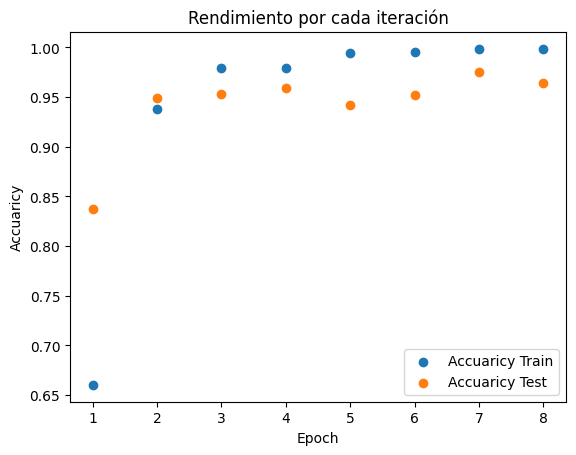

In [23]:
plot_accuracy(epochs, metrics)

## En este caso el modelo aumenta su accuaricy rapido y en el 2 epoch se alcanza un alto grado y muy bajo overfiting ademas el modelo sigue una estructura similar luego alcanza la mayor performance en el numero 4

# Finalmente este ultimo modelo sera seleccionado para realzar el modelo final.

In [25]:
def img_load(img_path):
    transform = transforms.Compose([

        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    img = io.imread(img_path)
    img = Image.fromarray(img)
    img = transform(img)
    return img.unsqueeze(0) 

model.eval()
with torch.no_grad():
    predictions = model(img_load('../../data_test/scissors_2.jpg'))
    predicted_classes = torch.argmax(predictions, dim=1)
    
    
predicted_classes

tensor([2])